Bernardino Payan ID: 9000684321 Email: b.payan8432@student.nu.edu

Micro Project 1

In [52]:
pwd

'/Users/bernardinopayan'

In [53]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Working directory:
DATA = Path('.')

In [23]:
# load the data
nasdaq_df = pd.read_csv(DATA / 'nasdq.csv')
# review first seven records
nasdaq_df.head(10)

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000
5,2010-01-11,6.746667,6.800000,6.700000,6.760000,5364300.0,0.11,1.4536,17.55,0.21,0.11,1150.699951,82.519997
6,2010-01-12,6.720000,6.766667,6.606667,6.643333,5198400.0,0.11,1.4523,18.25,0.20,0.11,1128.900024,80.790001
7,2010-01-13,6.616667,6.716667,6.583333,6.706667,6831900.0,0.11,1.4492,17.85,0.19,0.11,1136.400024,79.650002
8,2010-01-14,6.673333,6.763333,6.643333,6.750000,4493700.0,0.11,1.4478,17.63,0.20,0.11,1142.599976,79.389999
9,2010-01-15,6.740000,6.800000,6.676667,6.720000,6981900.0,0.11,1.4376,17.91,0.19,0.12,1130.099976,78.000000


In [55]:
#data information
# Display the number of data points and their data types
print("\nData Types and Non-Null Counts:")
print(nasdaq_df.info())


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3914 non-null   datetime64[ns]
 1   Open          3914 non-null   float64       
 2   High          3914 non-null   float64       
 3   Low           3914 non-null   float64       
 4   Close         3914 non-null   float64       
 5   Volume        3914 non-null   float64       
 6   InterestRate  3914 non-null   float64       
 7   ExchangeRate  3914 non-null   float64       
 8   VIX           3914 non-null   float64       
 9   TEDSpread     3914 non-null   float64       
 10  EFFR          3914 non-null   float64       
 11  Gold          3914 non-null   float64       
 12  Oil           3914 non-null   float64       
 13  DailyReturn   3913 non-null   float64       
 14  20_MA         3895 non-null   float64       
dtypes: da

In [56]:
# data dimension
nasdaq_df.shape

(3914, 15)

In [49]:
# Check for missing values in the entire DataFrame
missing_values = nasdaq_df.isnull().sum()

print("\nMissing Values:\n", missing_values)


Missing Values:
 Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
InterestRate     0
ExchangeRate     0
VIX              0
TEDSpread        0
EFFR             0
Gold             0
Oil              0
DailyReturn      1
20_MA           19
dtype: int64


In [57]:
# variable dat types
nasdaq_df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
InterestRate           float64
ExchangeRate           float64
VIX                    float64
TEDSpread              float64
EFFR                   float64
Gold                   float64
Oil                    float64
DailyReturn            float64
20_MA                  float64
dtype: object

In [58]:
print(nasdaq_df.describe())

                                Date         Open         High           Low  \
count                           3914  3914.000000  3914.000000  3.914000e+03   
mean   2017-05-30 11:26:53.285641216     0.000000     0.000000  5.809241e-17   
min              2010-01-04 00:00:00    -1.189749    -1.188348 -1.191602e+00   
25%              2013-09-17 06:00:00    -0.926617    -0.926986 -9.265981e-01   
50%              2017-05-30 12:00:00    -0.280183    -0.283956 -2.755513e-01   
75%              2021-02-09 18:00:00     0.923195     0.923257  9.167086e-01   
max              2024-10-25 00:00:00     2.358349     2.328236  2.315035e+00   
std                              NaN     1.000128     1.000128  1.000128e+00   

             Close        Volume  InterestRate  ExchangeRate           VIX  \
count  3914.000000  3.914000e+03  3.914000e+03  3.914000e+03  3.914000e+03   
mean      0.000000  2.904620e-17  5.809241e-17  6.971089e-16  7.261551e-17   
min      -1.192926 -1.032349e+00 -6.769082e-0

In [59]:
# Clean Data
# Check column names
print(nasdaq_df.columns)

# Clean column names of any whitespace
nasdaq_df.columns = nasdaq_df.columns.str.strip()

# Attempt to convert 'Date' column to datetime
if 'Date' in nasdaq_df.columns:
    nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'], errors='coerce')
else:
    print("Column 'Date' not found in DataFrame.")

# Check for NaT values after conversion
if nasdaq_df['Date'].isnull().any():
    print("Some date conversions failed. NaT (Not a Time) found in the Date column.")
    # Optionally drop these rows
    nasdaq_df.dropna(subset=['Date'], inplace=True)

# Remove duplicate rows, if any
nasdaq_df.drop_duplicates(inplace=True)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'InterestRate',
       'ExchangeRate', 'VIX', 'TEDSpread', 'EFFR', 'Gold', 'Oil',
       'DailyReturn', '20_MA'],
      dtype='object')


In [40]:
# Check the DataFrame after cleaning
print(nasdaq_df.info())
print(nasdaq_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3914 non-null   datetime64[ns]
 1   Open          3914 non-null   float64       
 2   High          3914 non-null   float64       
 3   Low           3914 non-null   float64       
 4   Close         3914 non-null   float64       
 5   Volume        3914 non-null   float64       
 6   InterestRate  3914 non-null   float64       
 7   ExchangeRate  3914 non-null   float64       
 8   VIX           3914 non-null   float64       
 9   TEDSpread     3914 non-null   float64       
 10  EFFR          3914 non-null   float64       
 11  Gold          3914 non-null   float64       
 12  Oil           3914 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 397.6 KB
None
        Date      Open      High       Low     Close     Volume  InterestRat

In [60]:
# Summary statistics
print("\nSummary Statistics:\n", nasdaq_df.describe())

# Identify potential outliers using the IQR (Interquartile Range) method example
Q1 = nasdaq_df.quantile(0.25)
Q3 = nasdaq_df.quantile(0.75)
IQR = Q3 - Q1

# Boolean DataFrame showing where outliers are located
outliers = (nasdaq_df < (Q1 - 1.5 * IQR)) | (nasdaq_df > (Q3 + 1.5 * IQR))

# Columns with outliers
outlier_columns = outliers.any(axis=0)
print("\nColumns with potential outliers:\n", outlier_columns[outlier_columns == True].index)


Summary Statistics:
                                 Date         Open         High           Low  \
count                           3914  3914.000000  3914.000000  3.914000e+03   
mean   2017-05-30 11:26:53.285641216     0.000000     0.000000  5.809241e-17   
min              2010-01-04 00:00:00    -1.189749    -1.188348 -1.191602e+00   
25%              2013-09-17 06:00:00    -0.926617    -0.926986 -9.265981e-01   
50%              2017-05-30 12:00:00    -0.280183    -0.283956 -2.755513e-01   
75%              2021-02-09 18:00:00     0.923195     0.923257  9.167086e-01   
max              2024-10-25 00:00:00     2.358349     2.328236  2.315035e+00   
std                              NaN     1.000128     1.000128  1.000128e+00   

             Close        Volume  InterestRate  ExchangeRate           VIX  \
count  3914.000000  3.914000e+03  3.914000e+03  3.914000e+03  3.914000e+03   
mean      0.000000  2.904620e-17  5.809241e-17  6.971089e-16  7.261551e-17   
min      -1.192926 -1.0

/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [61]:
from sklearn.preprocessing import StandardScaler

# Normalize/Standardize certain features
scaler = StandardScaler()
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'InterestRate', 
                   'ExchangeRate', 'VIX', 'TEDSpread', 'EFFR', 'Gold', 'Oil']

nasdaq_df[numeric_columns] = scaler.fit_transform(nasdaq_df[numeric_columns])

In [62]:
# Create a new column for the daily return percentage
nasdaq_df['DailyReturn'] = nasdaq_df['Close'].pct_change() * 100

# Create moving averages
nasdaq_df['20_MA'] = nasdaq_df['Close'].rolling(window=20).mean()

# Check column names
print(nasdaq_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'InterestRate',
       'ExchangeRate', 'VIX', 'TEDSpread', 'EFFR', 'Gold', 'Oil',
       'DailyReturn', '20_MA'],
      dtype='object')


In [72]:
# Get the number of data points (rows) and features (columns)
num_data_points, num_features = nasdaq_df.shape
print(f"Number of data points: {num_data_points}")
print(f"Number of features: {num_features}")

# Display the data types of each column
data_types = nasdaq_df.dtypes
print("\nData Types of Each Column:")
print(data_types)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Column Names': nasdaq_df.columns,
    'Data Types': nasdaq_df.dtypes,
    'Non-Null Count': nasdaq_df.notnull().sum()
})
print("\nSummary of Data Points and Types:")
print(summary_df)

Number of data points: 3914
Number of features: 15

Data Types of Each Column:
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
InterestRate           float64
ExchangeRate           float64
VIX                    float64
TEDSpread              float64
EFFR                   float64
Gold                   float64
Oil                    float64
DailyReturn            float64
20_MA                  float64
dtype: object

Summary of Data Points and Types:
              Column Names      Data Types  Non-Null Count
Date                  Date  datetime64[ns]            3914
Open                  Open         float64            3914
High                  High         float64            3914
Low                    Low         float64            3914
Close                Close         float64            3914
Volume              Volume         float64           

In [68]:
# Calculate Q1 and Q3 for DailyReturn
Q1_return = nasdaq_df['DailyReturn'].quantile(0.25)
Q3_return = nasdaq_df['DailyReturn'].quantile(0.75)
IQR_return = Q3_return - Q1_return

# Calculate Q1 and Q3 for 20_MA
Q1_ma = nasdaq_df['20_MA'].quantile(0.25)
Q3_ma = nasdaq_df['20_MA'].quantile(0.75)
IQR_ma = Q3_ma - Q1_ma

# Identify outliers for DailyReturn
outlier_condition_return = (nasdaq_df['DailyReturn'] < (Q1_return - 1.5 * IQR_return)) | \
                           (nasdaq_df['DailyReturn'] > (Q3_return + 1.5 * IQR_return))
outliers_return = nasdaq_df[outlier_condition_return]

# Identify outliers for 20_MA
outlier_condition_ma = (nasdaq_df['20_MA'] < (Q1_ma - 1.5 * IQR_ma)) | \
                       (nasdaq_df['20_MA'] > (Q3_ma + 1.5 * IQR_ma))
outliers_ma = nasdaq_df[outlier_condition_ma]

# Count the number of outliers
num_outliers_return = outliers_return.shape[0]
num_outliers_ma = outliers_ma.shape[0]

# Print the number of outliers
print(f"Number of outliers in Daily Returns: {num_outliers_return}")
print(f"Number of outliers in 20-Day Moving Average: {num_outliers_ma}")

Number of outliers in Daily Returns: 717
Number of outliers in 20-Day Moving Average: 0


In [74]:
# Save the DataFrame to a CSV file in the current directory
nasdaq_df.to_csv('/Users/bernardinopayan/nasdaq_cleaned.csv', index=False)

print("Data successfully saved to /Users/bernardinopayan/nasdaq_cleaned.csv")

Data successfully saved to /Users/bernardinopayan/nasdaq_cleaned.csv


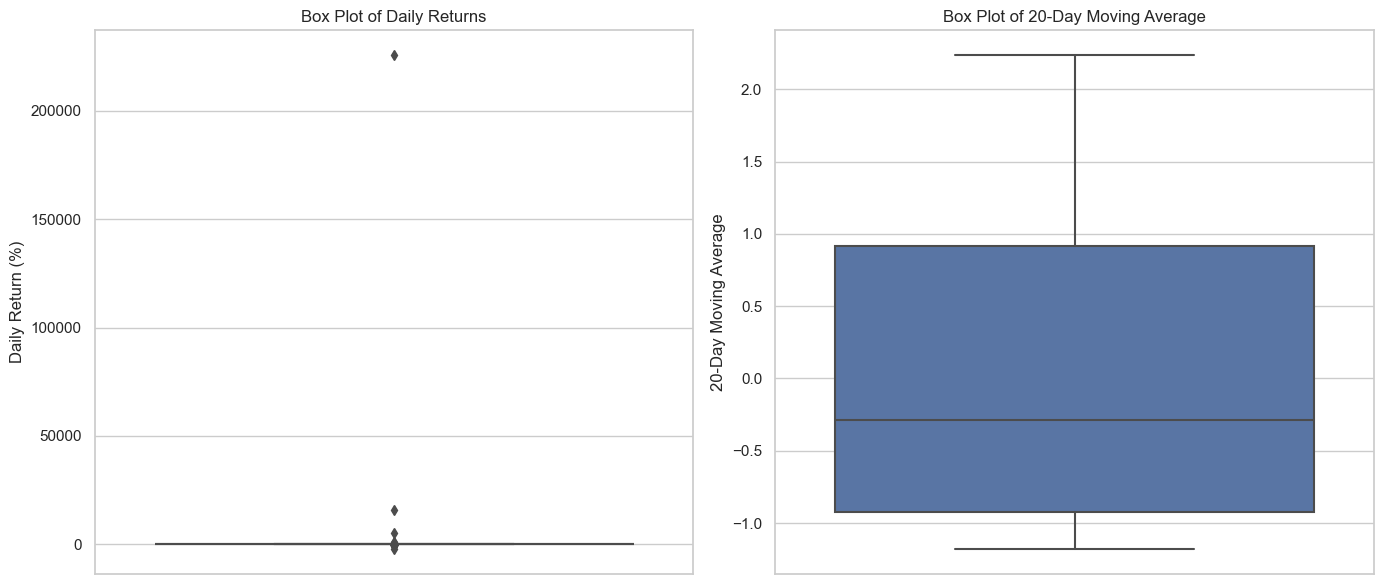

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axes to plot side by side
plt.figure(figsize=(14, 6))

# Plot box plot for DailyReturn
plt.subplot(1, 2, 1)
sns.boxplot(y=nasdaq_df['DailyReturn'])
plt.title('Box Plot of Daily Returns')
plt.ylabel('Daily Return (%)')
plt.xlabel('')

# Plot box plot for 20_MA
plt.subplot(1, 2, 2)
sns.boxplot(y=nasdaq_df['20_MA'])
plt.title('Box Plot of 20-Day Moving Average')
plt.ylabel('20-Day Moving Average')
plt.xlabel('')

# Show the plots
plt.tight_layout()
plt.show()